In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [79]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt 
X,y = make_classification(n_samples= 100, n_features= 2 , n_informative =1 , n_redundant =0 , 
                         n_classes = 2 , n_clusters_per_class=1, random_state = 41, hypercube = False,class_sep = 30 )

In [80]:
X

array([[ 0.82321545, -0.11697552],
       [ 0.37514771, -0.73115232],
       [ 0.26947761, -0.7081059 ],
       [-4.98744874, -2.01199214],
       [ 0.4231285 ,  1.63493163],
       [-4.2289949 ,  0.15599044],
       [-5.18865382,  1.07782053],
       [ 0.7096287 ,  0.80626713],
       [ 0.06531501,  0.74859527],
       [-5.3563263 ,  0.75152794],
       [-5.17487315, -0.90114581],
       [-5.17644221, -0.1815243 ],
       [ 0.60202649, -2.98092432],
       [ 1.42960231,  1.20500136],
       [-5.22359581,  0.78302407],
       [ 1.01127528,  0.42968688],
       [ 0.48288133, -0.73229726],
       [-5.27614308, -0.83930476],
       [ 0.44163889,  0.83727062],
       [-5.167179  , -0.10255323],
       [-5.67316396,  0.65867001],
       [-5.4617787 ,  0.92649819],
       [-4.71348919,  0.10216193],
       [ 2.2344006 ,  0.46886454],
       [-4.61308761,  0.45432938],
       [ 1.2379403 ,  1.8613386 ],
       [-5.18419324, -0.79255991],
       [-4.43807529, -1.0004391 ],
       [-5.79725951,

In [81]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

## Perceptron Trick Using Step Function 

In [82]:
def perceptron (X,y):
    X=np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr= 0.01
    for i in range (1000):
        point =np.random.randint(0,100)
        z= np.dot(X[point],weights)
        y_pred = step(z)
        weights = weights +lr*(y[point]-y_pred)*X[point]
    return weights[0], weights[1:]

In [83]:
def step(x):
    return 1 if x>=0 else 0

In [84]:
intercept_, coef_ = perceptron(X,y)

In [85]:
print("intercept ==> ", intercept_)
print("coefs ==>",coef_)

intercept ==>  1.1500000000000001
coefs ==> [1.07015803 0.62271845]


In [86]:
m= - coef_[0]/coef_[1]
b= - intercept_/coef_[1]

In [87]:
print (f"M= {m} , B= {b}")

M= -1.7185262965216699 , B= -1.846741499262912


In [88]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input+b


(-3.0, 2.0)

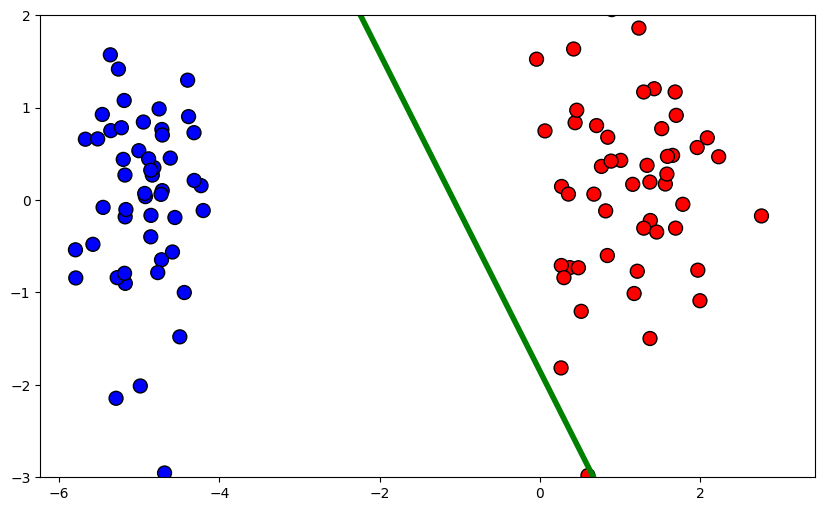

In [89]:
plt.figure(figsize=(10,6))
plt.plot(x_input , y_input , color = 'green',linewidth=4)
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr',edgecolor = 'k',s=100)
plt.ylim(-3,2)

## Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression 
log= LogisticRegression()
log.fit(X,y)

LogisticRegression()

In [91]:
m= - log.coef_[0][0]/log.coef_[0][1]
b= - log.intercept_/log.coef_[0][1]

In [92]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input+b

(-3.0, 2.0)

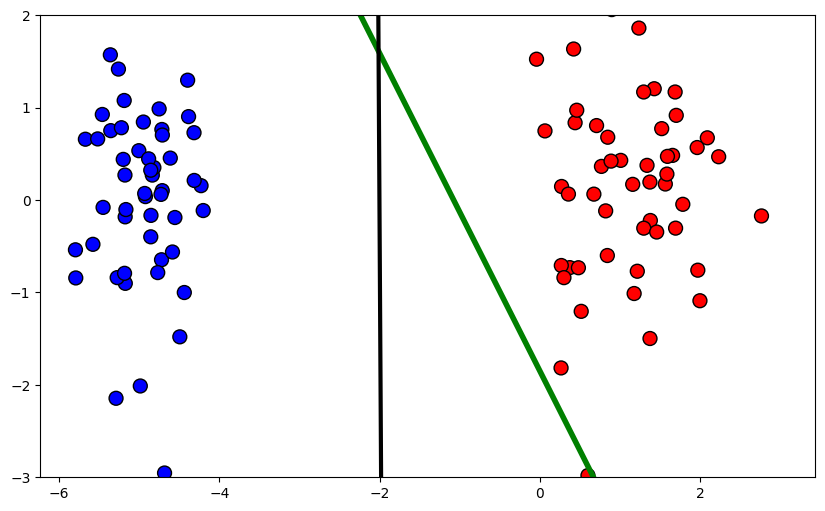

In [93]:
plt.figure(figsize=(10,6))
plt.plot(x_input , y_input , color = 'green',linewidth=4)
plt.plot(x_input1 , y_input1 , color = 'black',linewidth=3)

plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr',edgecolor = 'k',s=100)
plt.ylim(-3,2)

## Perceptron Trick Using Sigmoid Function 

In [97]:
def perceptron_sig (X,y):
    X=np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr= 0.01
    for i in range (1000):
        point =np.random.randint(0,100)
        z= np.dot(X[point],weights)
        y_pred = sigmoid(z)
        weights = weights +lr*(y[point]-y_pred)*X[point]
    return weights[0], weights[1:]

In [98]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [99]:
intercept_, coef_ = perceptron_sig(X,y)

In [100]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [102]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

(-3.0, 2.0)

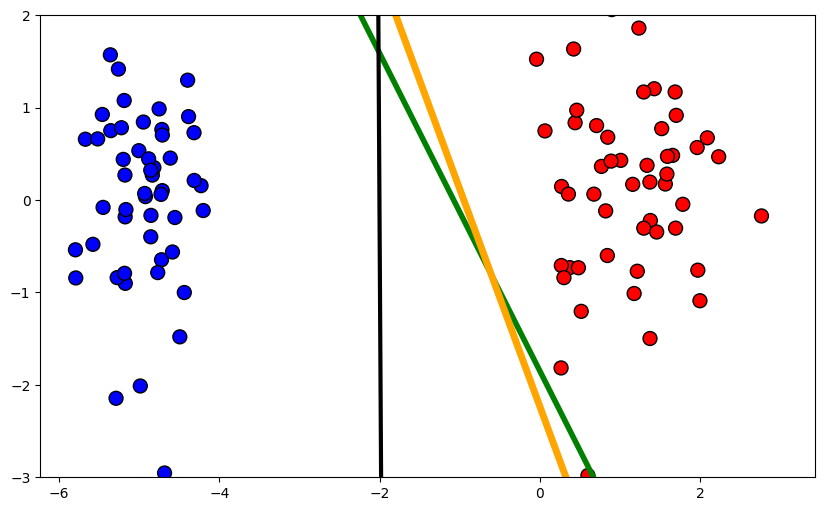

In [107]:
plt.figure(figsize=(10,6))
plt.plot(x_input , y_input , color = 'green',linewidth=4)
plt.plot(x_input1 , y_input1 , color = 'black',linewidth=3)
plt.plot(x_input2 , y_input2 , color = 'orange',linewidth=5)

plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr',edgecolor = 'k',s=100)
plt.ylim(-3,2)